In [2]:
import json
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'batch_size=256')

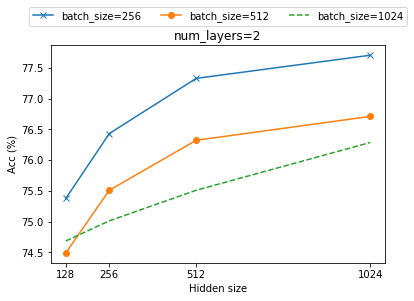

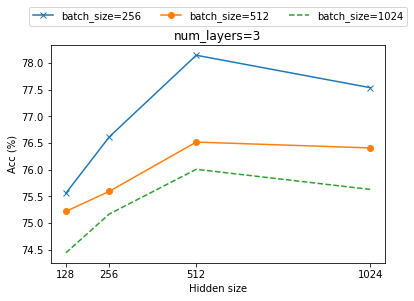

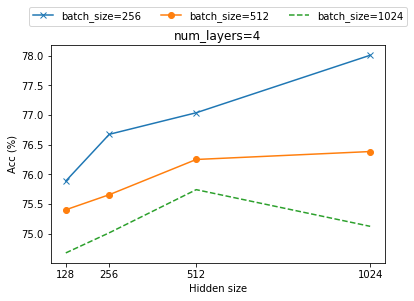

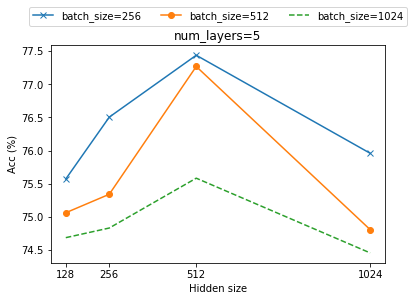

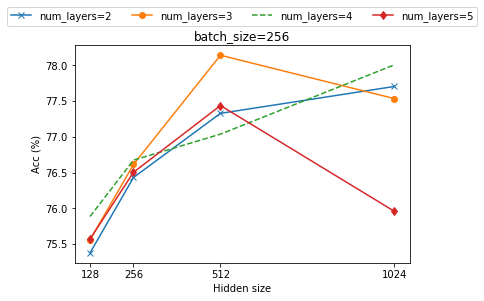

In [3]:
data=json.loads(Path("train1.json").read_text() )
d={}
for i in range(len(data)):
    tmp=data[i]['params']
    tmp['acc']=data[i]['sentence_acc']
    d[str(i)]=tmp
df = pd.DataFrame(list(d.values()))

for n in df.num_layers.unique().tolist():
    style=iter(['-x','-o','--','-d'])
    dd=df.loc[df['num_layers']==n]
    fig, ax = plt.subplots()
    for batch in dd.batch_size.unique().tolist():
        ddd=dd.loc[dd['batch_size']==batch]
        ax.plot(ddd['hidden_size'],ddd['acc'],next(style),label=f"batch_size={batch}")
    plt.xlabel('Hidden size')
    plt.ylabel('Acc (%)')
    ax.legend(loc='upper center',prop={'size':10},ncol = 5,bbox_to_anchor=(0.5, 1.2))
    plt.xticks(dd.hidden_size.unique().tolist())
    plt.title(f"num_layers={n}")
    
dd=df.loc[df['batch_size']==256]
fig, ax = plt.subplots()
style=iter(['-x','-o','--','-d'])
for n in dd.num_layers.unique().tolist():
    ddd=dd.loc[dd['num_layers']==n]
    ax.plot(ddd['hidden_size'],ddd['acc'],next(style),label=f"num_layers={n}")
plt.xlabel('Hidden size')
plt.ylabel('Acc (%)')
ax.legend(loc='upper center',prop={'size':10},ncol = 5,bbox_to_anchor=(0.5, 1.2))
plt.xticks(dd.hidden_size.unique().tolist())
plt.title(f"batch_size={256}")

In [4]:
data=json.loads(Path("train2.json").read_text() )
d={}
for i in range(len(data)):
    tmp=data[i]['params']
    tmp['acc']=data[i]['sentence_acc']
    d[str(i)]=tmp
df = pd.DataFrame(list(d.values()))

Text(0.5, 1.0, 'hidden_size=512, batch_size=256, num_layers=3')

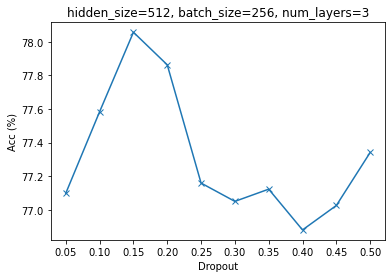

In [11]:
style=iter(['-x','-o','--','-d'])
fig, ax = plt.subplots()
ax.plot(df.dropout,df.acc,'-x')
plt.xlabel('Dropout')
plt.ylabel('Acc (%)')
plt.xticks(df.dropout.unique().tolist())
plt.title(f"hidden_size=512, batch_size=256, num_layers=3")

In [9]:
df


,hidden_size,num_layers,batch_size,dropout,lr,acc
0,512,3,256,0.05,0.1,77.098403
1,512,3,256,0.10,0.1,77.583656
2,512,3,256,0.15,0.1,78.056604
3,512,3,256,0.20,0.1,77.862672
4,512,3,256,0.25,0.1,77.159039
5,512,3,256,0.30,0.1,77.050058
6,512,3,256,0.35,0.1,77.122705
7,512,3,256,0.40,0.1,76.880170
8,512,3,256,0.45,0.1,77.025661
9,512,3,256,0.50,0.1,77.341026
